In [7]:
import tensorflow as tf

In [8]:
IMG_SHAPE=(224,224,3)
base_model= tf.keras.applications.MobileNet(weights='imagenet',input_shape=IMG_SHAPE, include_top=False)
x=base_model.output
x= tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=tf.keras.layers.Dense(1024,activation='relu')(x) #dense layer 2
x=tf.keras.layers.Dense(512,activation='relu')(x) #dense layer 3
preds=tf.keras.layers.Dense(6,activation='softmax')(x) #final layer with softmax activation

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

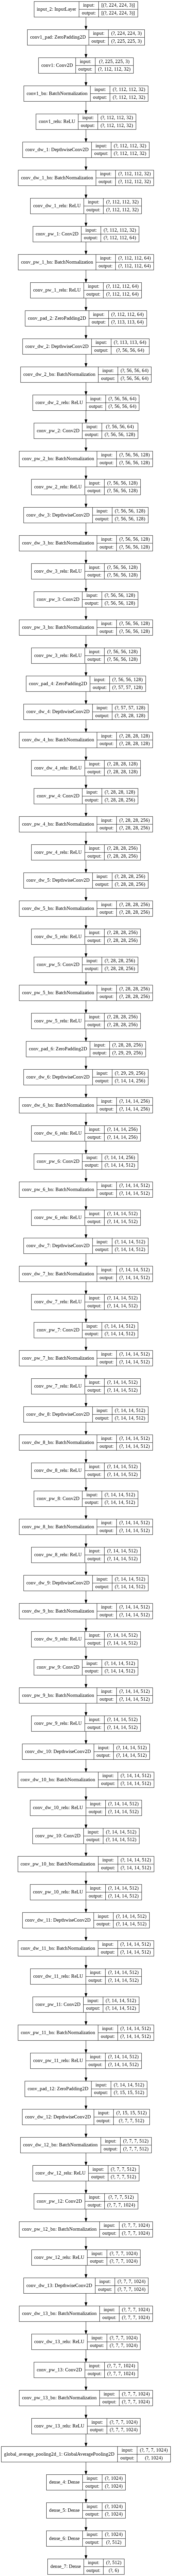

In [12]:
model=tf.keras.models.Model(inputs=base_model.input,outputs=preds)
model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [ ]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Data/Train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
dev_datagen=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) #included in our dependencies

dev_generator=dev_datagen.flow_from_directory('/content/drive/My Drive/Data/Dev',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) #included in our dependencies

test_generator=test_datagen.flow_from_directory('/content/drive/My Drive/Data/Test',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 4358 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1199 images belonging to 6 classes.


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("/content/drive/My Drive/TFLite2/mobileNet_1.pb",
                                                monitor="val_acc",
                                                verbose=0,
                                                save_best_only=True,
                                                )

early = tf.keras.callbacks.EarlyStopping(monitor='val_acc',
                                         min_delta=0,
                                         patience=20,
                                         verbose=1,
                                         mode='auto')

In [ ]:
hist=model.fit_generator(generator= train_generator,
                         steps_per_epoch= 2,
                         epochs= 100,
                         validation_data= dev_generator,
                         validation_steps=1,
                         callbacks=[checkpoint,early],
                         verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 2.1017 - acc: 0.1562WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/TFLite2/mobileNet_1.pb/assets
2/2 [==============================] - 73s 36s/step - loss: 2.1017 - acc: 0.1562 - val_loss: 1.8562 - val_acc: 0.2812
Epoch 2/100
2/2 [==============================] - 62s 31s/step - loss: 1.8104 - acc: 0.2188 - val_loss: 1.7553 - val_acc: 0.2188
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 1.7623 - acc: 0.2188

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2/2 [==============================] - 46s 23s/step - loss: 1.7979 - acc: 0.2031 - val_loss: 1.6939 - val_acc: 0.2188
Epoch 4/100
2/2 [==============================] - 65s 32s/step - loss: 1.7557 - acc: 0.2031 - val_loss: 1.5996 - val_acc: 0.4375
Epoch 5/100
2/2 [==============================] - 57s 29s/step - loss: 1.6478 - acc: 0.2500 - val_loss: 1.5498 - val_acc: 0.4375
Epoch 6/100
2/2 [==============================] - 55s 28s/step - loss: 1.5380 - acc: 0.4375 - val_loss: 1.4326 - val_acc: 0.5625
Epoch 7/100
2/2 [==============================] - 45s 23s/step - loss: 1.3671 - acc: 0.6094 - val_loss: 1.3333 - val_acc: 0.6250
Epoch 8/100
2/2 [==============================] - 59s 30s/step - loss: 1.2112 - acc: 0.7656 - val_loss: 1.1779 - val_acc: 0.7500
Epoch 9/100
2/2 [==============================] - 44s 22s/step - loss: 1.0763 - acc: 0.7344 - val_loss: 1.0731 - val_acc: 0.7500
Epoch 10/100
2/2 [==============================] - 34s 17s/step - loss: 1.1185 - acc: 0.6562 - val_lo

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


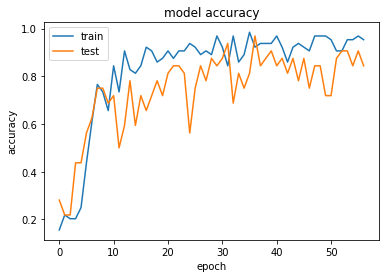

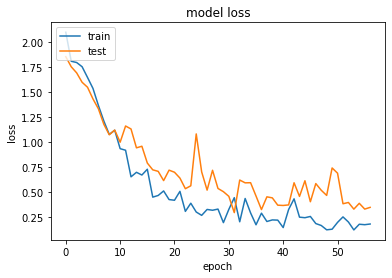

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/TFLite2/mobileNet_1.pb')

In [ ]:
score=model.evaluate(test_generator)
print(score)

23/38 [=================>............] - ETA: 44s - loss: 0.2607 - acc: 0.9130

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


38/38 [==============================] - 116s 3s/step - loss: 0.2337 - acc: 0.9241
[0.2336781919002533, 0.9241034388542175]


In [ ]:
saved_model_dir = '/content/drive/My Drive/TFLite2'
tf.saved_model.save(model, saved_model_dir)
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()
with open('/content/drive/My Drive/TFLite2/model_final.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /content/drive/My Drive/TFLite2/assets


In [ ]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('/content/drive/My Drive/TFLite2/labels_final.txt', 'w') as f:
    f.write(labels)